# **Color Palette Generator**

- Color Quantization via K-Means Clustering

___

In [6]:
!pip install -U pandas

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Import Image

In [8]:
from PIL import Image

# For Image Links
import requests
from io import BytesIO

Open Image

ref. https://www.thisgrowinghome.com/spring-color-palettes/

In [9]:
image_path = "spring_flowers.png"

In [10]:
img = Image.open(image_path)

Check Image Pixel Coordinates

In [11]:
img.size

(683, 1024)

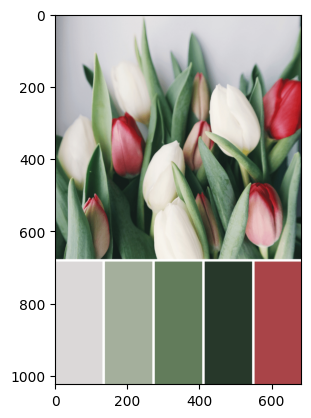

In [12]:
plt.imshow(img)

Crop Image
- show only main content, hide color palette

In [13]:
def crop_image_from_top(image_path, percentage_top, percentage_bottom, new_width):
    # Open the image using PIL
    image = Image.open(image_path)

    # Get the current dimensions of the image
    width, height = image.size

    # Calculate the pixel coordinates for cropping
    top = int(height * percentage_top)
    bottom = int(height * percentage_bottom)

    # Crop the image
    cropped_image = image.crop((0, top, width, bottom))

    # Calculate the new height based on the desired aspect ratio
    new_height = int((bottom - top) * new_width / width)

    # Resize the cropped image to the desired dimensions
    resized_image = cropped_image.resize((new_width, new_height))

    return resized_image

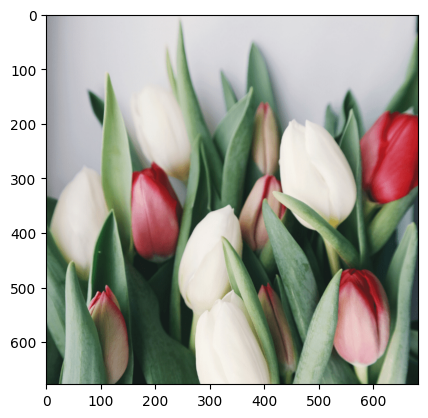

In [14]:
width, height = img.size

percentage_top = 0  #crop from bottom
percentage_bottom = 0.663 #crop from top (66.3%)
new_width = width

cropped_img = crop_image_from_top(image_path, percentage_top, percentage_bottom, new_width)

plt.imshow(cropped_img)

Clearly visualize cropped image

In [15]:
cropped_img.size

(683, 678)

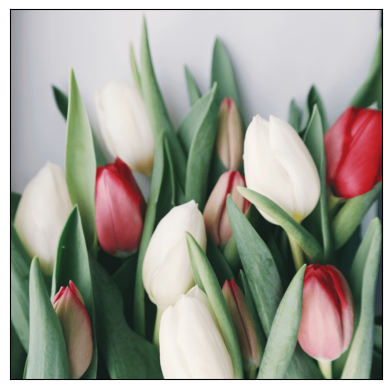

In [16]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(cropped_img)

In [17]:
print(cropped_img)

<PIL.Image.Image image mode=P size=683x678 at 0x7FE879D9A3E0>


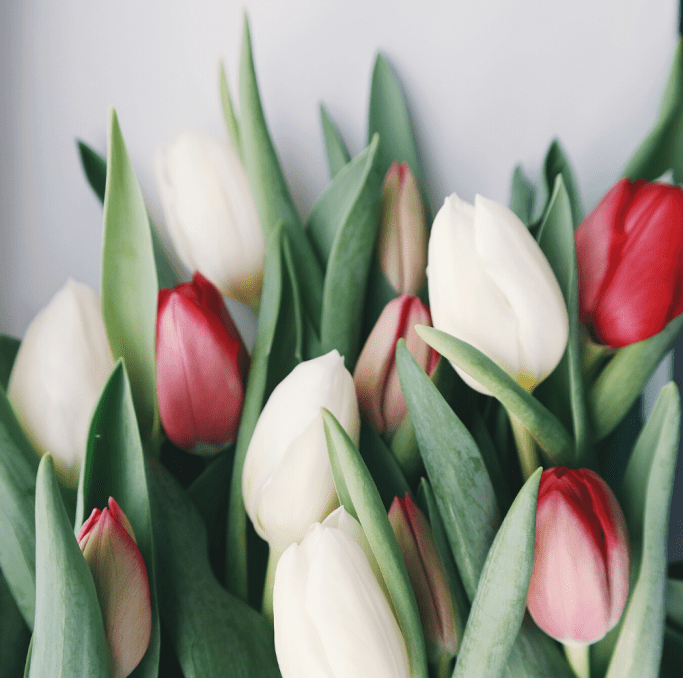

In [18]:
rgb_image = cropped_img.convert(mode='RGB')
rgb_image

# Generate Palette via K-Means Clustering

In [19]:
import seaborn as sns
import colorsys
import plotly.express as px

In [20]:
from sklearn.cluster import KMeans
import pandas as pd

In [21]:
# Convert RGB to HEX
def rgb_to_hex(r, g, b):
  return '#{:02x}{:02x}{:02x}'.format(r, g, b)

In [22]:
def generate_palette(image, palette_size):
  n_dims = np.array(image).shape[-1]

  r, g, b = np.array(image).reshape(-1, n_dims).T

  df = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=1000)

  kmeans_model = KMeans(n_clusters=palette_size,
                        random_state=0,
                        init="k-means++",
                        n_init="auto").fit(df)
  palette = kmeans_model.cluster_centers_.astype(int).tolist()
  palette.sort(key=lambda rgb: (lambda r, g, b: colorsys.rgb_to_hsv(r, g, b))(*rgb))
  list_hex=[]
  for each_rgb_col in palette:
    list_hex.append(rgb_to_hex(each_rgb_col[0], each_rgb_col[1], each_rgb_col[2]))

  sns.set_palette(list_hex)
  return sns.color_palette()

In [23]:
reshaped_image = np.array(rgb_image)
reshaped_image

array([[[152, 153, 159],
        [152, 153, 159],
        [152, 153, 159],
        ...,
        [ 60,  93,  88],
        [ 46,  58,  65],
        [ 24,  44,  41]],

       [[145, 147, 151],
        [152, 153, 159],
        [152, 153, 159],
        ...,
        [ 60,  93,  88],
        [ 46,  58,  65],
        [ 24,  44,  41]],

       [[152, 153, 159],
        [152, 153, 159],
        [142, 157, 162],
        ...,
        [ 60,  93,  88],
        [ 46,  58,  65],
        [ 24,  44,  41]],

       ...,

       [[ 37,  60,  45],
        [ 33,  55,  41],
        [ 30,  57,  36],
        ...,
        [ 21,  34,  27],
        [ 21,  34,  27],
        [ 21,  34,  27]],

       [[ 33,  55,  41],
        [ 33,  55,  41],
        [ 33,  55,  41],
        ...,
        [ 19,  28,  25],
        [ 19,  28,  25],
        [ 21,  34,  27]],

       [[ 33,  55,  41],
        [ 33,  55,  41],
        [ 33,  55,  41],
        ...,
        [ 21,  34,  27],
        [ 21,  34,  27],
        [ 21,  34,  27]]

In [24]:
image = reshaped_image

In [25]:
image.shape

(678, 683, 3)

In [26]:
n_dims = image.shape[-1]
n_dims

3

In [27]:
generate_palette(image, 5)

[(0.8588235294117647, 0.8470588235294118, 0.8392156862745098),
 (0.6352941176470588, 0.6627450980392157, 0.592156862745098),
 (0.3843137254901961, 0.4745098039215686, 0.3607843137254902),
 (0.16470588235294117, 0.23137254901960785, 0.16862745098039217),
 (0.6470588235294118, 0.2, 0.23137254901960785)]

In [28]:
def generate_palette_labels(image, palette_size):
  n_dims = np.array(image).shape[-1]

  r, g, b = np.array(image).reshape(-1, n_dims).T

  df = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=1000)

  kmeans_model = KMeans(n_clusters=palette_size,
                        random_state=0,
                        init="k-means++",
                        n_init="auto").fit(df)
  palette = kmeans_model.cluster_centers_.astype(int).tolist()
  palette.sort(key=lambda rgb: (lambda r, g, b: colorsys.rgb_to_hsv(r, g, b))(*rgb))
  list_hex=[]
  for each_rgb_col in palette:
    list_hex.append(rgb_to_hex(each_rgb_col[0], each_rgb_col[1], each_rgb_col[2]))


  img_rgb = np.array([palette], dtype=np.uint8)
  fig = px.imshow(img_rgb, width=500, height=150)

  fig.update_layout(xaxis=dict(ticktext=list_hex, tickvals=list(range(len(list_hex)))), margin=dict(t=0, b=0, l=10, r=10))
  fig.update_yaxes(visible=False)
  return fig.show()

In [29]:
generate_palette_labels(image, 5)

# Cluster Analysis
- middle or center values from each cluster are retrieved
- then added to the palette

In [30]:
def analyze_cluster(image, palette_size):
  n_dims = np.array(image).shape[-1]
  r, g, b = np.array(image).reshape(-1, n_dims).T
  df = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=1000)
  kmeans_model = KMeans(n_clusters=palette_size,
                        random_state=0,
                        init="k-means++",
                        n_init="auto").fit(df)

  clusters = kmeans_model.predict(df)
  df['n_cluster'] = clusters

  df[df['n_cluster'] == 0].head()

  df['hex_code'] = df.apply(lambda x: rgb_to_hex(x[0], x[1], x[2]), axis = 1)
  for each_cluster in range(0, palette_size):
    print('Cluster ', each_cluster)
    display(sns.color_palette(list(df[df['n_cluster'] == each_cluster]['hex_code'][:10])))


In [31]:
analyze_cluster(image, 5)

Cluster  0


[(0.10588235294117647, 0.19607843137254902, 0.12549019607843137),
 (0.11764705882352941, 0.2235294117647059, 0.1411764705882353),
 (0.15294117647058825, 0.21176470588235294, 0.13333333333333333),
 (0.2, 0.19607843137254902, 0.14901960784313725),
 (0.19215686274509805, 0.28627450980392155, 0.23529411764705882),
 (0.2, 0.3254901960784314, 0.2235294117647059),
 (0.21568627450980393, 0.34901960784313724, 0.23529411764705882),
 (0.11764705882352941, 0.25882352941176473, 0.1450980392156863),
 (0.1450980392156863, 0.23529411764705882, 0.17647058823529413),
 (0.24313725490196078, 0.22745098039215686, 0.16862745098039217)]

Cluster  1


[(0.7333333333333333, 0.7411764705882353, 0.7725490196078432),
 (0.8588235294117647, 0.8549019607843137, 0.8745098039215686),
 (0.8313725490196079, 0.8313725490196079, 0.8509803921568627),
 (0.9450980392156862, 0.9294117647058824, 0.9058823529411765),
 (0.8823529411764706, 0.8784313725490196, 0.8745098039215686),
 (0.9294117647058824, 0.9176470588235294, 0.8901960784313725),
 (0.9137254901960784, 0.9019607843137255, 0.8784313725490196),
 (0.9568627450980393, 0.9411764705882353, 0.9215686274509803),
 (0.8313725490196079, 0.8, 0.7568627450980392),
 (0.7490196078431373, 0.7568627450980392, 0.7843137254901961)]

Cluster  2


[(0.6, 0.6980392156862745, 0.6078431372549019),
 (0.7333333333333333, 0.7843137254901961, 0.6941176470588235),
 (0.6627450980392157, 0.6705882352941176, 0.6980392156862745),
 (0.5568627450980392, 0.615686274509804, 0.6352941176470588),
 (0.8549019607843137, 0.6470588235294118, 0.6352941176470588),
 (0.6627450980392157, 0.6705882352941176, 0.6980392156862745),
 (0.6392156862745098, 0.6509803921568628, 0.6784313725490196),
 (0.7372549019607844, 0.5529411764705883, 0.5686274509803921),
 (0.6196078431372549, 0.6235294117647059, 0.6470588235294118),
 (0.5568627450980392, 0.6549019607843137, 0.4392156862745098)]

Cluster  3


[(0.4, 0.30980392156862746, 0.25882352941176473),
 (0.2823529411764706, 0.4196078431372549, 0.26666666666666666),
 (0.4, 0.30980392156862746, 0.25882352941176473),
 (0.30196078431372547, 0.41568627450980394, 0.34901960784313724),
 (0.49019607843137253, 0.5882352941176471, 0.40784313725490196),
 (0.2901960784313726, 0.3843137254901961, 0.30980392156862746),
 (0.45098039215686275, 0.5803921568627451, 0.5019607843137255),
 (0.25098039215686274, 0.396078431372549, 0.28627450980392155),
 (0.3333333333333333, 0.4823529411764706, 0.32941176470588235),
 (0.3843137254901961, 0.48627450980392156, 0.3568627450980392)]

Cluster  4


[(0.8392156862745098, 0.3686274509803922, 0.4588235294117647),
 (0.792156862745098, 0.2196078431372549, 0.2823529411764706),
 (0.7764705882352941, 0.16862745098039217, 0.20784313725490197),
 (0.6627450980392157, 0.16862745098039217, 0.19215686274509805),
 (0.5647058823529412, 0.10196078431372549, 0.12156862745098039),
 (0.7254901960784313, 0.20392156862745098, 0.24313725490196078),
 (0.6588235294117647, 0.2980392156862745, 0.32941176470588235),
 (0.6627450980392157, 0.16862745098039217, 0.19215686274509805),
 (0.7411764705882353, 0.12156862745098039, 0.14901960784313725),
 (0.7490196078431373, 0.38823529411764707, 0.44313725490196076)]

# Ground Truth

Get original palette

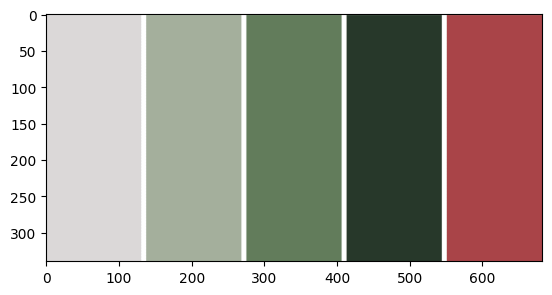

In [32]:
img = Image.open("spring_flowers.png")

width, height = img.size
new_height = 340

left = 0
top = height - new_height
right = width
bottom = height

cropped_img = img.crop((left, top, right, bottom))

cropped_img.save("spring_flowers_palette.png")

plt.imshow(cropped_img)

Install extcolor library (For color extraction)

In [33]:
!pip install extcolors
import extcolors

Extract colors from image

In [34]:
colors, pixel_count = extcolors.extract_from_path("spring_flowers_palette.png")
print(colors)

[((219, 216, 216), 98993), ((98, 124, 91), 88818), ((169, 68, 72), 44409)]


Show organized results (extracted colors and occurence rate %)

In [35]:
!extcolors spring_flowers_palette.png --image spring_flowers_palette

Extracted colors:
(219, 216, 216):  42.63% (98993)
(98, 124, 91)  :  38.25% (88818)
(169, 68, 72)  :  19.12% (44409)

Pixels in output: 232220 of 232220


# Feature Extraction : CNN

# Image Segmentation : FCNN

# Harmonic Color Suggestion : LSTM